In [6]:
import cv2
import matplotlib.pyplot as plt

from stego.core import coder
from stego.core import message as msg_utils
from stego.core import blocking

from pathlib import Path


from stego import config


In [7]:

image_dir = config.get_images_dir()
image_name = "img_2448x2448_3x8bit_SRC_RGB_baloons.png"
image_path = str(Path(image_dir) / image_name)

image_original = cv2.imread(image_path, cv2.IMREAD_COLOR)


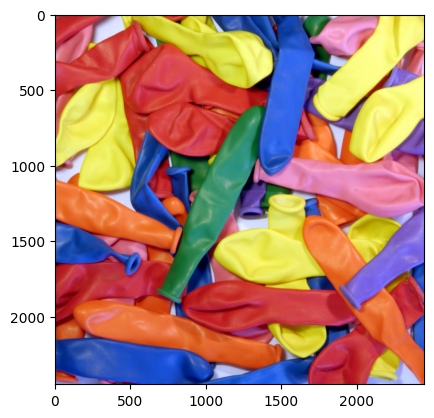

In [8]:
params = {
    "alpha": 1,
    "block_size": 3,
    "level": 2,
    "wavelet": "haar",
    "coefficients": ["ad", "da", "dd"]
}

image, new_shape = blocking.crop_image_to_divisible(image_original, params["block_size"] * 2 ** params["level"])


channels = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb))
message = b"Hello world!"
message_parts = coder.message_dispatcher(channels[0], message, **params)
stego_channels = [coder.encode(channel, message_parts, **params) for channel in channels]
plt.imshow(cv2.cvtColor(cv2.merge(stego_channels), cv2.COLOR_YCrCb2RGB))


In [9]:
message_parts = []

for channel in stego_channels:
    message_parts += coder.decode(channel, **params)

message_consolidated = coder.message_consolidator(stego_channels[0], message_parts, **params)
message_extracted = msg_utils.extract_repeating_fragment(message_consolidated)
print(message_extracted)

b'Hello world!'
